In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.8MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 310kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.60MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 17.0MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
batch_size = 64
train_data = DataLoader(training_data,batch_size=batch_size)
test_data = DataLoader(test_data,batch_size=batch_size)

In [10]:
len(test_data)

157

In [8]:
len(training_data)

(60000, 157)

In [5]:
for X, y in test_data:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


### Visualising the dataset

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

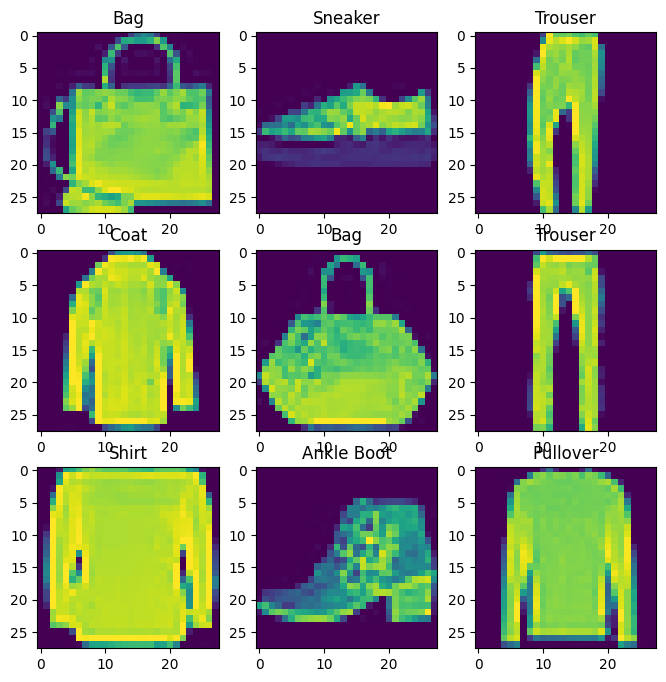

In [17]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    idx = torch.randint(len(training_data),size=(1,)).item()
    figure.add_subplot(rows,cols,i)
    img,label = training_data[idx]
    plt.imshow(img.squeeze())
    plt.title(labels_map[label])

plt.show()

In [12]:
torch.randint(len(training_data),size=(1,)).item()

2130

In [19]:
class customimagedataset(dataset):
  def __init__(self,)

In [23]:
import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Using {device} device")

Using cpu device


### Define the model

In [60]:
class nnetwirk(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10))

  def forward(self,x):
      x = self.flatten(x)
      logits = self.linear_relu_stack(x)
      return logits

In [61]:
model = nnetwirk().to(device)
print(model)

nnetwirk(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [62]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3)

In [63]:
def train(dataloader,model,loss_fn,optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device),y.to(device)
    pred = model(X)
    loss = loss_fn(pred,y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if batch % 100 == 0:
      loss,current = loss.item(),batch*len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [66]:
def test(dataloader,model,loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss,correct = 0,0

  with torch.no_grad():
    for X,y in dataloader:
      X,y = X.to(device),y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size

In [67]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_data, model, loss_fn, optimizer)
    test(test_data, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.160727 [    0/60000]
loss: 2.150487 [ 6400/60000]
loss: 2.091604 [12800/60000]
loss: 2.100506 [19200/60000]
loss: 2.082296 [25600/60000]
loss: 1.999107 [32000/60000]
loss: 2.033241 [38400/60000]
loss: 1.955310 [44800/60000]
loss: 1.952947 [51200/60000]
loss: 1.892576 [57600/60000]
Epoch 2
-------------------------------
loss: 1.914311 [    0/60000]
loss: 1.894925 [ 6400/60000]
loss: 1.769885 [12800/60000]
loss: 1.804838 [19200/60000]
loss: 1.739640 [25600/60000]
loss: 1.656883 [32000/60000]
loss: 1.680690 [38400/60000]
loss: 1.585093 [44800/60000]
loss: 1.605847 [51200/60000]
loss: 1.506805 [57600/60000]
Epoch 3
-------------------------------
loss: 1.583144 [    0/60000]
loss: 1.558009 [ 6400/60000]
loss: 1.396981 [12800/60000]
loss: 1.468059 [19200/60000]
loss: 1.379831 [25600/60000]
loss: 1.344486 [32000/60000]
loss: 1.363251 [38400/60000]
loss: 1.289941 [44800/60000]
loss: 1.325153 [51200/60000]
loss: 1.228158 [57600/60000]
Epoch 4
--

In [68]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [69]:
model = nnetwirk()
model.load_state_dict(torch.load("model.pth"))

<ipython-input-69-0b952c0f362e>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))


<All keys matched successfully>

In [70]:
model.eval()

nnetwirk(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [71]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [74]:
model.eval()
iter = iter(test_data)
x,y = next(iter)
x,y = x[0],y[0]
with torch.no_grad():
  x = x.to(device)
  pred = model(x)
  predicted,actual = classes[pred[0].argmax(0)],classes[y]
  print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
